# Example using scikit-learn: PrecisionRecall vs ROC Curves

In [0]:
# Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

## Generate normally distributed numpy arrays for two equally balanced classes

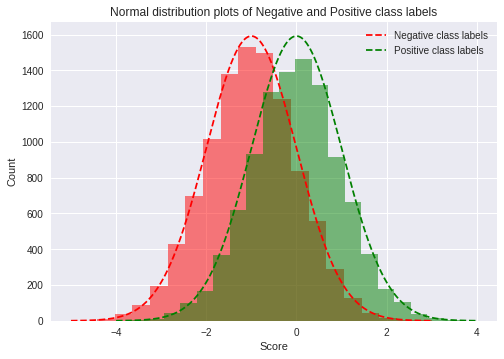

In [0]:
def normal_distribution(mu, sigma, N, bins, label, plt_color, is_plot=True):
  # Simulate score data from a normal distribution based on: mu, sigma and N
  scores = np.sort(norm.rvs(loc=mu, scale=sigma, size=N))
  
  # Get bell curve for reference
  x = np.linspace(-4, 4, N)
  bell = norm.pdf(x) * N * max(norm.pdf(x))
  
  if is_plot:
    plt.hist(scores, normed=0, color=plt_color, alpha=.5, bins=bins)
    plt.plot(x+mu, bell, '--', label=label, color=plt_color)
  
  return scores, x, bell

BINS = 20

plt.figure()

# Distribution for Negative class labels
N1 = 10000
mu1 = -1  # distribution is offset by -1 from the centre
sigma1 = 1
label1 = 'Negative class labels'
scores1, x1, bell1 = normal_distribution(mu1, sigma1, N1, BINS, label1, plt_color='red')

# Distribution for Positive class labels
N2 = 10000
mu2 = 0
sigma2 = 1
label2 = 'Positive class labels'
scores2, x2, bell2 = normal_distribution(mu2, sigma2, N2, BINS, label2, plt_color='green')

# Plot
plt.title("Normal distribution plots of Negative and Positive class labels")
plt.xlabel('Score')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

# Build two lists for (i) all the true labels (ii) all the score values

In [0]:
# Append the true class labels to the list of negative class labels
y_true = N1*[0] + N2*[1] 
y_score = list(scores1) + list(scores2)
y_score = [np.round(y,2) for y in y_score]

print("N1, N2:", N1, N2)
print("len(y_true):", len(y_true))
assert(len(y_true) == len(y_score))
print("---")

print("Mid 10 values (right most negative red scores, left most positive green scores:")
print("y_true[N1-5:N1+5]:", y_true[N1-5:N1+5])
print("y_score[N1-5:N1+5]:", y_score[N1-5:N1+5])


N1, N2: 10000 10000
len(y_true): 20000
---
Mid 10 values (right most negative red scores, left most positive green scores:
y_true[N1-5:N1+5]: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_score[N1-5:N1+5]: [2.34, 2.51, 2.69, 2.73, 3.4, -3.67, -3.47, -3.25, -3.24, -3.23]


## ROC and Precision-Recall curves

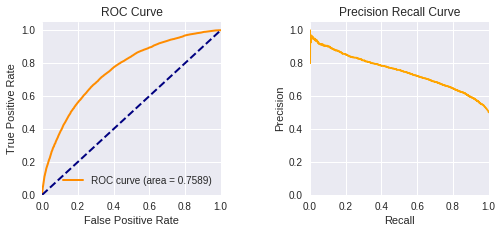

In [0]:
# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _ = roc_curve(y_true, y_score)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_true, y_score)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()